In [241]:
import os
import nltk
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from os import listdir
from os.path import isfile, join
import seaborn as sns

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
source = "source/"
for fn in source:
    print fn

s
o
u
r
c
e
/


In [288]:
source = "/Users/bobminnich/Documents/Columbia/Courses/DataVisualization/Edav-Text/source"
files = [f for f in listdir(source) if isfile(join(source, f))]

filenames_with_path = []
for i in files:
    filenames_with_path.append(source+ "/" + i)


In [300]:
len(files)

224

In [289]:
raw_texts = []
for fn in filenames_with_path:
    with open(fn) as f:
        text = f.read()
        text = text.replace('_', '')  # remove underscores (italics)
        raw_texts.append(text)

In [290]:
vectorizer = CountVectorizer(input='content', stop_words="english")

In [291]:
dtm = vectorizer.fit_transform(raw_texts)

In [292]:
vocab = np.array(vectorizer.get_feature_names())

In [293]:
dtm = dtm.toarray()

In [294]:
rates = 1000 * dtm / np.sum(dtm, axis=1, keepdims=True)

In [295]:
import pandas as pd

In [296]:
df = pd.DataFrame(dtm)

In [297]:
print rates.shape
print df.shape

(224, 24156)
(224, 24156)


In [298]:
df.columns = vocab

In [70]:
from sklearn import decomposition


In [72]:
pca = decomposition.PCA(n_components=50)

In [74]:
new = pca.fit_transform(df)

In [77]:
new.shape

(224, 50)

In [86]:
from sklearn.manifold import TSNE

In [87]:
tsne = TSNE()

In [89]:
tsnew = tsne.fit_transform(new)

In [91]:
%matplotlib inline
import matplotlib.pylab as plt

In [256]:
parties = np.unique(finaldf["Political Party"])
cols = sns.color_palette("Set2", 7)

col_dict = dict(zip(parties,cols))
col_dict["Whig"]

(0.89573241682613591, 0.76784315109252932, 0.58182240093455595)

In [267]:
finaldf.shape

(232, 19)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


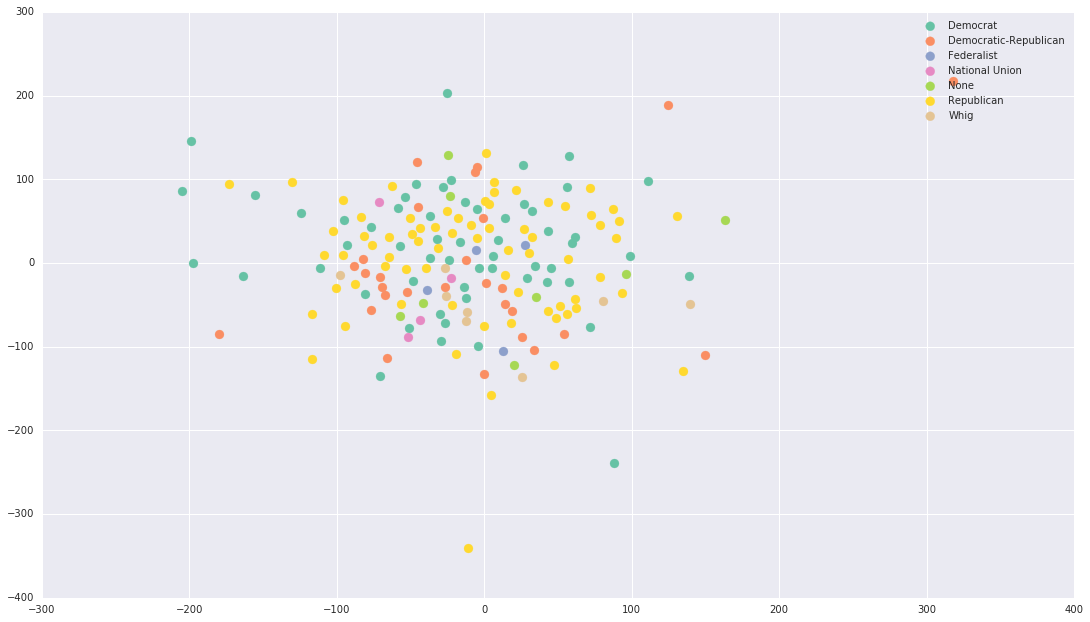

In [363]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

x = tsnew[:,0]
y = tsnew[:,1]
#plt.scatter(x,y)
#plt.text(x,y,finaldf.Namea)


plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in parties:
    intdf = plot_df[plot_df["Political Party"]==i]
    plt.scatter(intdf.x,intdf.y,color = col_dict[i], s = 80 )


# for i, txt in enumerate(files):
#     #plt.annotate(finaldf.Name[i], (x[i],y[i]))
#     plt.scatter(x[i],y[i],color = col_dict[finaldf["Political Party"][i]], s = 80 )

plt.legend(parties)

In [108]:
doc_years = []
for i in files:
    doc_years.append(int(i.split("_")[0]))

In [311]:
doc_df = pd.DataFrame(files)


In [458]:
pres_df = pd.read_csv("PresidentInfo.csv")
a = list(pres_df.columns)
a[2] = "year"
a[0] = "name"
pres_df.columns = a


toc = pd.read_csv("table_of_contents.txt", header=-1)
toc["file"] = files
toc.columns = ["name","speech","MD","year", "File"]
toc = toc.drop("speech",1)
finaldf = pd.merge(toc,pres_df ,how="left",on=["name"])
finaldf = finaldf[finaldf.File.duplicated() == False]
finaldf.to_csv("President_Info2.csv")

In [459]:
stats_df = finaldf[finaldf.name.duplicated() == False]
stats_df.columns

Index([u'name', u'MD', u'year_x', u'File', u'Years in office', u'year_y',
       u'Age at inauguration', u'State elected from', u'# of electoral votes',
       u' # of popular votes ', u' National total votes ',
       u'Total electoral votes', u'Rating points', u'Political Party',
       u'Occupation', u'College', u'% electoral', u'% popular'],
      dtype='object')

In [460]:
ratings = stats_df["Rating points"]
ratings = ratings[np.isnan(ratings) == False]
median = np.percentile(ratings,50)
per_75 = np.percentile(ratings,75)
per_25 = np.percentile(ratings,25)


(array([ 3.,  0.,  0.,  1.,  3.,  4.,  1.,  0.,  1.,  3.,  3.,  2.,  1.,
         2.,  2.,  1.,  0.,  1.,  1.,  1.]),
 array([ 259.  ,  291.05,  323.1 ,  355.15,  387.2 ,  419.25,  451.3 ,
         483.35,  515.4 ,  547.45,  579.5 ,  611.55,  643.6 ,  675.65,
         707.7 ,  739.75,  771.8 ,  803.85,  835.9 ,  867.95,  900.  ]),
 <a list of 20 Patch objects>)

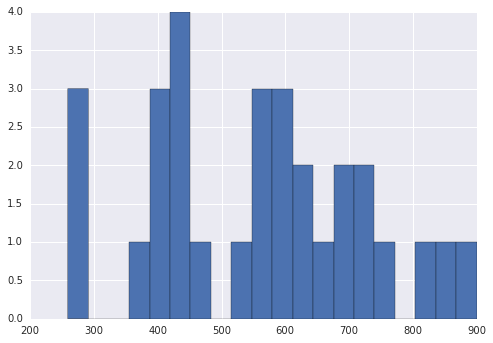

In [461]:
plt.hist(ratings,20)

In [464]:
ratings_colors = []
cols = sns.diverging_palette(260, 20, n=4)

sns.light_palette("red")
finaldf["RatingGroup"] = 0
for i in finaldf.index:
    if finaldf["Rating points"][i] <= per_25:
        ratings_colors.append(cols[0])
        finaldf["RatingGroup"][i] = 0
    elif finaldf["Rating points"][i] <= median:
        ratings_colors.append(cols[1])
        finaldf["RatingGroup"][i] = 1
    elif finaldf["Rating points"][i] <= per_75:
        ratings_colors.append(cols[2])
        finaldf["RatingGroup"][i] = 2
    elif finaldf["Rating points"][i] > per_75:
        ratings_colors.append(cols[3])
        finaldf["RatingGroup"][i] = 3
    else:
        ratings_colors.append([(0,0,0)])
        finaldf["RatingGroup"][i] = 4






/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

0
1
2
3


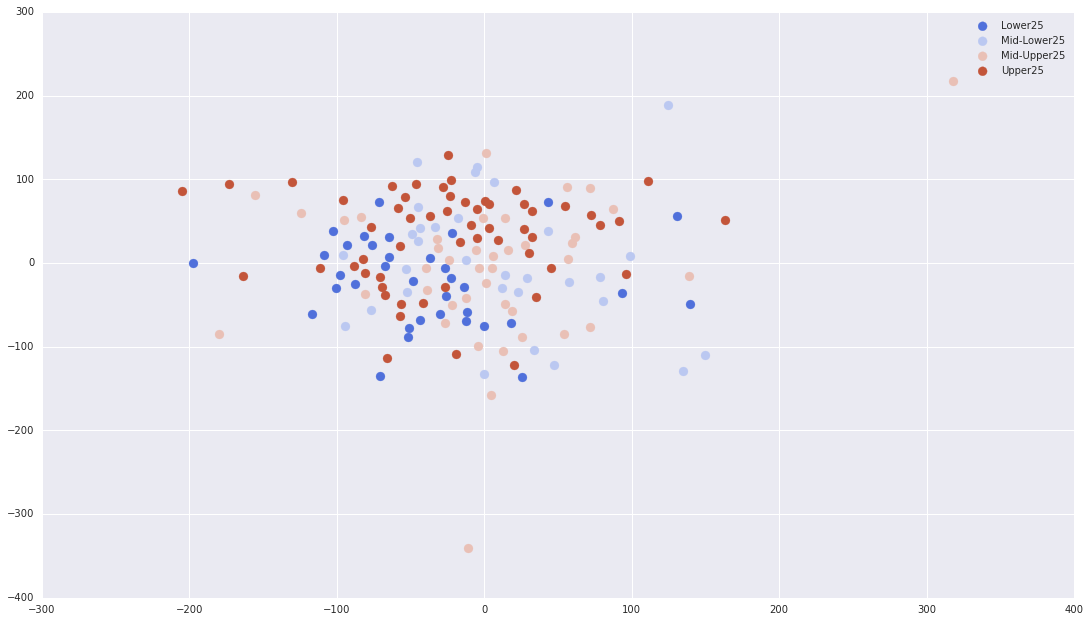

In [465]:
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

x = tsnew[:,0]
y = tsnew[:,1]
#plt.scatter(x,y)
#plt.text(x,y,finaldf.Namea)


plot_df = finaldf
plot_df["x"] = x
plot_df["y"] = y

for i in range(4):
    print i
    intdf = plot_df[plot_df["RatingGroup"]==i]
    plt.scatter(intdf.x,intdf.y,color = cols[i], s = 80 )


# for i, txt in enumerate(files):
#     #plt.annotate(finaldf.Name[i], (x[i],y[i]))
#     plt.scatter(x[i],y[i],color = col_dict[finaldf["Political Party"][i]], s = 80 )

plt.legend(["Lower25","Mid-Lower25","Mid-Upper25","Upper25"])

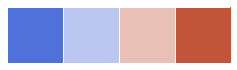

In [421]:
sns.palplot(sns.diverging_palette(260, 20, n=4))

##### 

In [425]:
cols